In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import argparse
from skimage.measure import compare_ssim

%matplotlib inline


In [61]:
img = cv2.imread('new3.jpg',cv2.IMREAD_COLOR)
#plt.figure(figsize=(20,20))
#plt.imshow(img)

In [2]:
import pymysql


def connect_db(sql,action):
    
    r=[]
    if action == "u":
        cursor.execute(sql)
        db.commit()
    if action == "s":
        cursor.execute(sql)
        results = cursor.fetchall()
        for row in results:
            r.append(row)
        return r

db = pymysql.connect("localhost","sebRM","sebrm","Rumbomobile")
cursor = db.cursor()


In [3]:
sql = "SELECT * FROM pklot2"
data = connect_db(sql,"s")
len(data)

270

In [4]:
coordsX=[]
b=[coordsX.append(data[i][1].split(",")) for i in range(len(data))]
coordsY=[]
b=[coordsY.append(data[i][2].split(",")) for i in range(len(data))]

In [5]:
coordsX = np.float32(coordsX)
coordsY = np.float32(coordsY)
coords = np.zeros(coordsX.shape,dtype = tuple)
coords_mag = np.sqrt(coordsX**2 + coordsY**2)
coords_mag.sort()
minmag = coords_mag[:,0]
maxmag = coords_mag[:,3]
for i in range(len(coordsX)):
    k = 1
    for j in range(len(coordsX[1])):
        
        if (np.abs(np.sqrt(coordsX[i][j]**2 + coordsY[i][j]**2) - minmag[i]) <=0.01):
            coords[i][0]=(coordsX[i][j],coordsY[i][j])
        elif (np.abs(np.sqrt(coordsX[i][j]**2 + coordsY[i][j]**2) - maxmag[i]) <=0.01):
            coords[i][2]=(coordsX[i][j],coordsY[i][j])
        else:
            coords[i][k]=(coordsX[i][j],coordsY[i][j])
            k = k + 2
        
            
coords.tolist();
coordsX = np.uint16(coordsX)
coordsY = np.uint16(coordsY)

In [7]:
masks = []
img = cv2.imread('new3.jpg',cv2.IMREAD_COLOR)
for i in range(len(coords)):
    ROI_corners = np.array([coords[i].tolist()], dtype=np.int32) 
    mask = np.zeros(img.shape, dtype=np.uint8)

    channel_count = img.shape[2]  
    ignore_mask_color = (255,)*channel_count
    cv2.fillPoly(mask, ROI_corners, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    masked_image = masked_image[np.min(coordsY[i]):np.max(coordsY[i]),np.min(coordsX[i]):np.max(coordsX[i])]
    masks.append(masked_image)
    
# apply the mask
#masked_image = cv2.bitwise_and(img, mask)

# save the result
#masked_image = masked_image[np.min(coordsY[i]):np.max(coordsY[i]),np.min(coordsX[i]):np.max(coordsX[i])]


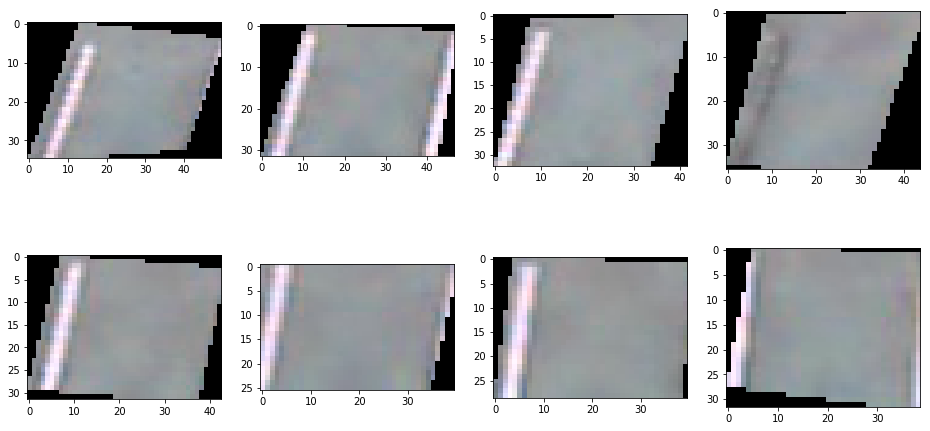

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.imshow(masks[0])
plt.subplot(2,4,2)
plt.imshow(masks[1])
plt.subplot(2,4,3)
plt.imshow(masks[2])
plt.subplot(2,4,4)
plt.imshow(masks[3])
plt.subplot(2,4,5)
plt.imshow(masks[4])
plt.subplot(2,4,6)
plt.imshow(masks[5])
plt.subplot(2,4,7)
plt.imshow(masks[6])
plt.subplot(2,4,8)
plt.imshow(masks[7])

In [9]:
img2 = cv2.imread('scar.jpg',cv2.IMREAD_COLOR)
masks2 = []
for i in range(len(coords)):
    ROI_corners = np.array([coords[i].tolist()], dtype=np.int32) 
    mask = np.zeros(img2.shape, dtype=np.uint8)

    channel_count = img2.shape[2]  
    ignore_mask_color = (255,)*channel_count
    cv2.fillPoly(mask, ROI_corners, ignore_mask_color)
    masked_image = cv2.bitwise_and(img2, mask)
    masked_image = masked_image[np.min(coordsY[i]):np.max(coordsY[i]),np.min(coordsX[i]):np.max(coordsX[i])]
    masks2.append(masked_image)

# plt.figure(figsize=(16,8))
# plt.subplot(2,4,1)
# plt.imshow(masks2[0])
# plt.subplot(2,4,2)
# plt.imshow(masks2[1])
# plt.subplot(2,4,3)
# plt.imshow(masks2[2])
# plt.subplot(2,4,4)
# plt.imshow(masks2[3])
# plt.subplot(2,4,5)
# plt.imshow(masks2[4])
# plt.subplot(2,4,6)
# plt.imshow(masks2[5])
# plt.subplot(2,4,7)
# plt.imshow(masks2[6])
# plt.subplot(2,4,8)
# plt.imshow(masks2[7])

#l1 = 50
#l2 = 255
#plt.figure(figsize=(16,8))
#plt.subplot(2,4,1)
#plt.imshow(cv2.Canny(masks2[0],l1,l2))
#plt.subplot(2,4,2)
#plt.imshow(cv2.Canny(masks2[1],l1,l2))
#plt.subplot(2,4,3)
#plt.imshow(cv2.Canny(masks2[2],l1,l2))
#plt.subplot(2,4,4)
#plt.imshow(cv2.Canny(masks2[3],l1,l2))
#plt.subplot(2,4,5)
#plt.imshow(cv2.Canny(masks2[4],l1,l2))
#plt.subplot(2,4,6)
#plt.imshow(cv2.Canny(masks2[5],l1,l2))
#plt.subplot(2,4,7)
#plt.imshow(cv2.Canny(masks2[6],l1,l2))
#plt.subplot(2,4,8)
#plt.imshow(cv2.Canny(masks2[7],l1,l2))


In [10]:

compare = []

for i in range(len(masks)): 

    img_A = masks[i]
    img_B = masks2[i]

    img_A = cv2.cvtColor(img_A,cv2.COLOR_BGR2GRAY)
    img_B = cv2.cvtColor(img_B,cv2.COLOR_BGR2GRAY)

    (score, diff) = compare_ssim(img_A, img_B, full=True)
    compare.append(score)
#     print(score)
#     plt.figure(figsize=(16,16))
#     plt.subplot(1,2,1)
#     plt.imshow(masks[i])
#     plt.subplot(1,2,2)
#     plt.imshow(masks2[i])
#     plt.show()


compare = np.float32(compare)
meh = (compare >0.56)
print(meh)
compare.sort()
print(compare)


[False  True False  True False  True  True False False  True False  True
  True False False  True  True False False False  True False  True  True
  True False False False False False  True]
[ 0.23169835  0.2934176   0.31755075  0.34384722  0.34397188  0.34613889
  0.34773144  0.37942386  0.38097927  0.42215401  0.43854755  0.44263062
  0.4586398   0.46245956  0.48773029  0.53126806  0.54468739  0.58666724
  0.59930062  0.61524487  0.62772125  0.63987941  0.6436075   0.6437518
  0.64945489  0.68051517  0.71043402  0.74432778  0.75291127  0.78223848
  0.78899908]


[149 164 185 173]
[105  88  88 104]
[(149.0, 105.0) (164.0, 88.0) (185.0, 88.0) (173.0, 104.0)]
182.280004389
186.118241986
204.863369102
201.853907567


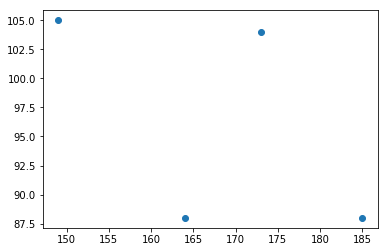

In [71]:
i = 49

print(coordsX[i])
print(coordsY[i])
print(coords[i])

mag1 = np.abs(np.sqrt(coordsX[i][0]**2 + coordsY[i][0]**2))
mag2 = np.abs(np.sqrt(coordsX[i][1]**2 + coordsY[i][1]**2))
mag3 = np.abs(np.sqrt(coordsX[i][2]**2 + coordsY[i][2]**2))
mag4 = np.abs(np.sqrt(coordsX[i][3]**2 + coordsY[i][3]**2))
print(mag1)
print(mag2)
print(mag3)
print(mag4)

plt.scatter(coordsX[i],coordsY[i]) 
plt.show()

In [6]:
def smooth_image(img_input, kernel_size):
    kernel = np.ones((kernel_size, kernel_size))/ kernel_size**2
   
   
    img_out = cv2.filter2D(img_input, cv2.CV_8U, kernel)
    #8U elimina bits valores negativos a bits
    return img_out

In [6]:
def obtain_pklots(entry,coords,coordsX,coordsY):
    masks = []
    image = entry
    for i in range(len(coords)):
        ROI_corners = np.array([coords[i].tolist()], dtype=np.int32) 
        mask = np.zeros(image.shape, dtype=np.uint8)
        cv2.fillPoly(mask, ROI_corners, (255))
        masked_image = cv2.bitwise_and(image, mask)
        masked_image = masked_image[np.min(coordsY[i]):np.max(coordsY[i]),np.min(coordsX[i]):np.max(coordsX[i])]
        masks.append(masked_image)
    return masks

In [41]:
img = cv2.imread('new3.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
test = 'test5.jpg'
img2 = cv2.imread(test,cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
pklot_empty = obtain_pklots(img,coords,coordsX,coordsY)
pklot_new = obtain_pklots(img2,coords,coordsX,coordsY)

In [42]:

compare = []
ms = []
for i in range(len(pklot_empty)): 

    img_A = pklot_empty[i]
    img_B = pklot_new[i]
    
    (score, diff) = compare_ssim(img_A, img_B, full=True)
    compare.append(score)
#     print(score)
#     plt.figure(figsize=(16,16))
#     plt.subplot(1,2,1)
#     plt.imshow(pklot_empty[i],cmap="gray")
#     plt.subplot(1,2,2)
#     plt.imshow(pklot_new[i],cmap="gray")
#     plt.show()


compare = np.float32(compare)
print(compare)
meh2= (compare>0.5)
compare.sort()
print(compare)
# print(meh2)


[ 0.42303151  0.38153577  0.46800861  0.57207745  0.35588968  0.36489466
  0.29728061  0.29076755  0.33828983  0.28881618  0.29202878  0.31871039
  0.19410811  0.27372044  0.22413485  0.34422126  0.24986918  0.40627456
  0.42491493  0.49662498  0.46084961  0.35725319  0.43590069  0.41814449
  0.26784402  0.40323192  0.31670937  0.3584156   0.33033049  0.30724695
  0.24610078  0.43705824  0.22166601  0.2048073   0.29075468  0.16511476
  0.26420698  0.18771607  0.23013073  0.06269927  0.10427687  0.14382008
  0.3208636   0.14207694  0.20750898  0.20633471  0.35460901  0.39889136
  0.45694885  0.50015062  0.36307275  0.29561883  0.36480099  0.36386594
  0.38507995  0.30824849  0.34943426  0.27268171  0.43037921  0.30669272
  0.32377186  0.34649545  0.24277307  0.40014321  0.25919095  0.30291477
  0.21279339  0.18343158  0.21329053  0.16786861  0.31389692  0.15501508
  0.0608935   0.16942778  0.29712337  0.22208349  0.24892968  0.67121679
  0.40147051  0.49838874  0.51386881  0.41651553  0

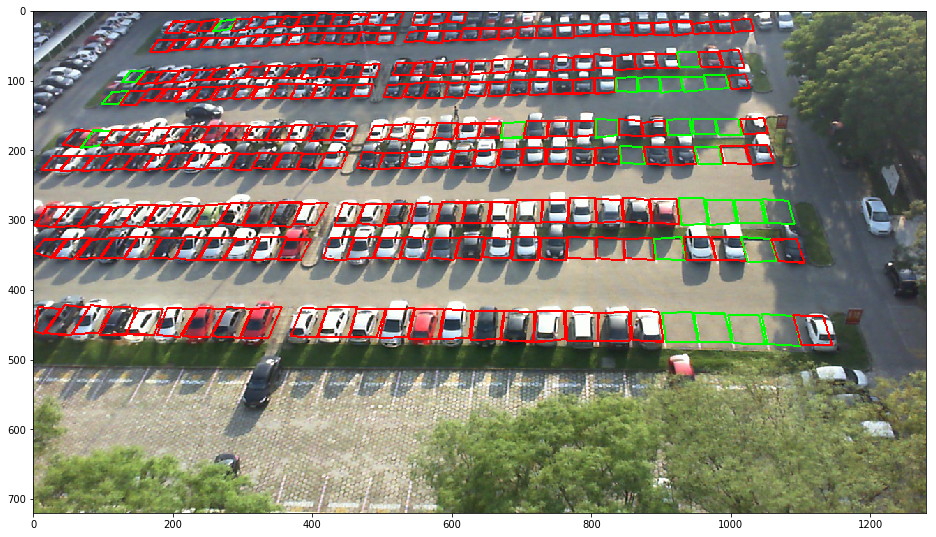

In [43]:
img_color = cv2.imread(test,cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
green = np.uint8([[[0,255,0 ]]])
red = np.uint8([[[255,0,0]]])

for i in range(len(coords)-14):
    if meh2[i]:
        color = (0,255,0)
    else:
        color = (255,0,0)
    cv2.line(img_color, coords[i][3], coords[i][0], color, thickness=2, lineType=8, shift=0)
    cv2.line(img_color, coords[i][0], coords[i][1], color, thickness=2, lineType=8, shift=0)
    cv2.line(img_color, coords[i][1], coords[i][2], color, thickness=2, lineType=8, shift=0)
    cv2.line(img_color, coords[i][2], coords[i][3], color, thickness=2, lineType=8, shift=0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
#     cv2.putText(img_color,str(i+1),coords[i][0], font, 0.4,(0,0,255),1,cv2.LINE_AA)

img_color = cv2.cvtColor(img_color,cv2.COLOR_RGB2BGR)
cv2.imwrite('test_out4.jpg',img_color)
img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,16))
plt.imshow(img_color)
plt.show()

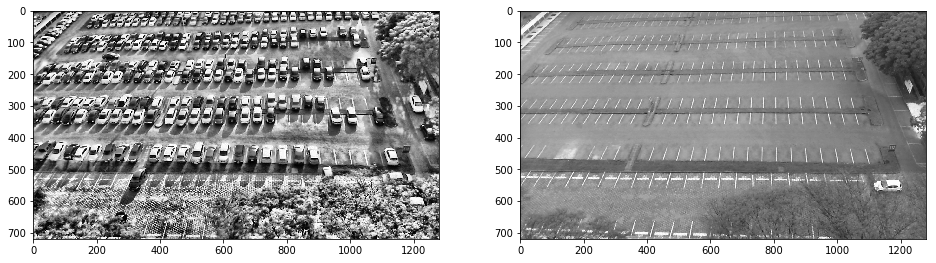

In [32]:
img_color = cv2.imread(test,cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(15,15))
cl1 = clahe.apply(img_color)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(cl1,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img,cmap="gray")
plt.show()

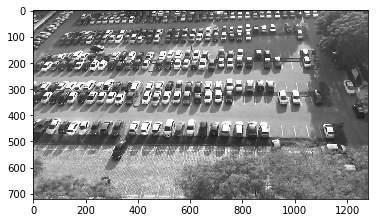

In [3]:
test = 'test5.jpg'
img_color = cv2.imread(test,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_color, cmap = "gray")

In [5]:
a = 1
str(a+

SyntaxError: invalid syntax (<ipython-input-5-dee160946459>, line 2)